In [90]:
import numpy as np

In [2]:
import pandas as pd

In [6]:
import seaborn as sns

In [54]:
from matplotlib import pyplot as plt

In [96]:
from mpl_toolkits import mplot3d

In [89]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Intro

This is a review of the official [`sklearn` example](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)

## 1. Prepare Data

In [31]:
iris = load_iris(as_frame=True)

In [57]:
y = iris["target"]
X = iris["data"]

In [58]:
data = pd.concat([X, y], axis=1)

In [59]:
data["target"] = iris["target_names"][data["target"]]

In [61]:
X, y = data.loc[:, data.columns != "target"], data.loc[:, ["target"]]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [63]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Quick EDA

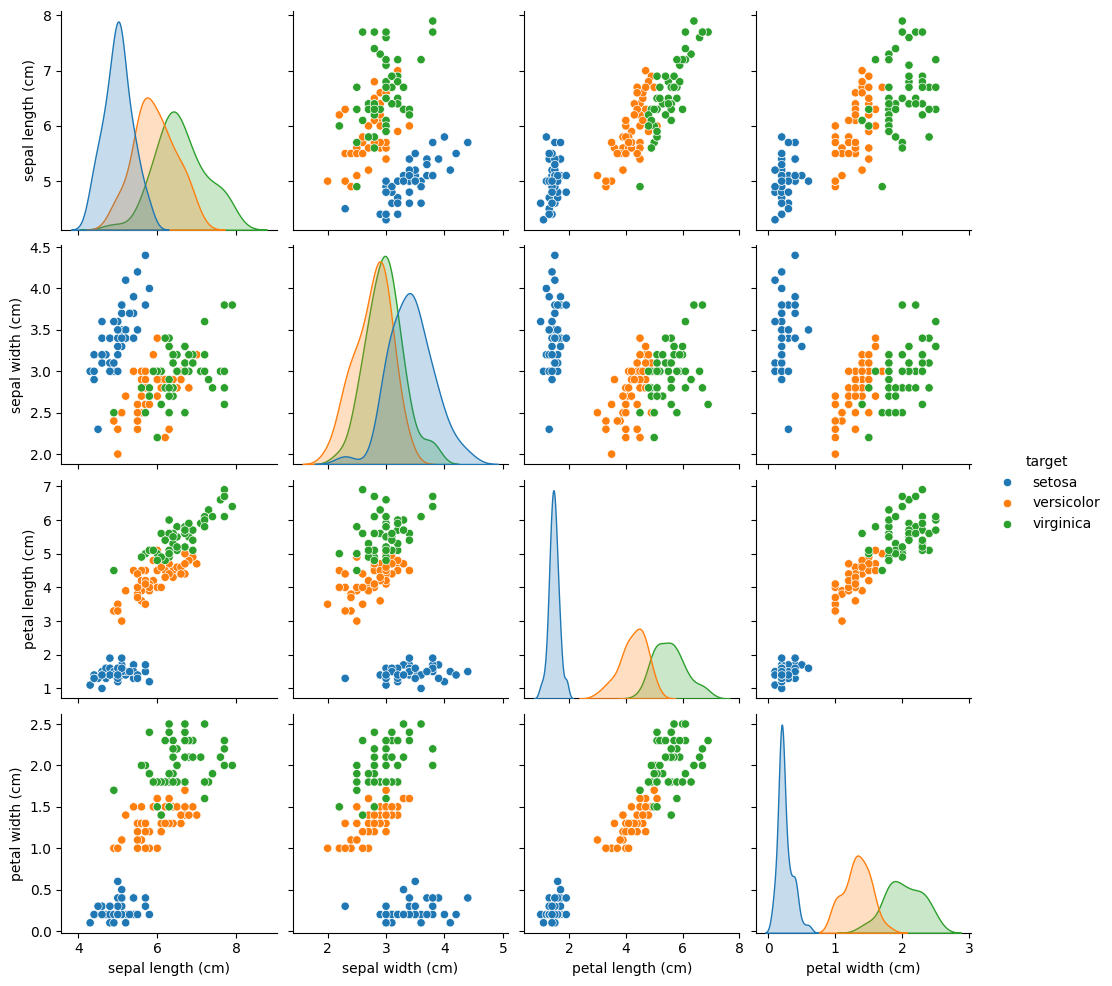

In [106]:
sns.pairplot(data, hue="target")

## 3. Scaling

In [65]:
scaler_ = StandardScaler(with_std=False)

In [75]:
X_train_scaled = scaler_.fit_transform(X=X_train)

## 4. Get Principal Components

In [82]:
n_components = 4

In [83]:
pca = PCA(n_components=n_components)

In [84]:
X_train_pca = pca.fit_transform(X=X_train_scaled)

In [93]:
total_explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
print(f"{total_explained_variance_ratio=}")

total_explained_variance_ratio=np.float64(0.9999999999999999)


In [95]:
cumsum_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
cumsum_explained_variance_ratio

array([0.92255618, 0.97781947, 0.99479117, 1.        ])

## 3-D Plot of the Principal Components

In [98]:
pca3d = PCA(n_components=3)

In [99]:
X_train_pca3d = pca3d.fit_transform(X=X_train)

In [120]:
fig = plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

In [121]:
ax = fig.add_subplot(1, 1, 1, projection="3d")

In [103]:
X_train_pca3d[:5, :]

array([[ 2.99235083e+00,  3.74761198e-01, -4.78406103e-01],
       [ 8.06448573e-01, -3.69434687e-01,  3.13989784e-01],
       [ 4.44764295e-01, -3.50764730e-01,  1.65159949e-03],
       [-2.43995656e+00,  2.51595337e-01, -6.04461648e-02],
       [ 8.63941791e-01,  1.56582203e-01, -3.06938134e-01]])

In [111]:
y_map = dict(zip(
    ["setosa", "versicolor", "virginica"],
    [0, 1, 2]
))

In [114]:
X_train_pca3d.shape

(120, 3)

In [115]:
y_train.shape

(120, 1)

In [128]:
scatter = ax.scatter(
    X_train_pca3d[:, 0],
    X_train_pca3d[:, 1],
    X_train_pca3d[:, 2],
    c=y_train["target"].apply(lambda x: y_map[x])
)

In [129]:
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

[Text(-1.0, 0, ''),
 Text(-0.8, -0.02495375866866517, ''),
 Text(-0.6, -0.016231728928574926, ''),
 Text(-0.3999999999999999, -0.007420114966002845, ''),
 Text(-0.19999999999999996, 0.0014824705268431872, ''),
 Text(0.0, 0.010477443651656065, ''),
 Text(0.20000000000000018, 0.019566250054956172, ''),
 Text(0.40000000000000013, 0.028750365702641653, ''),
 Text(0.6000000000000001, 0.03803129767903405, ''),
 Text(0.8, 0.04741058501132771, ''),
 Text(1.0, 0, '')]

In [130]:
ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

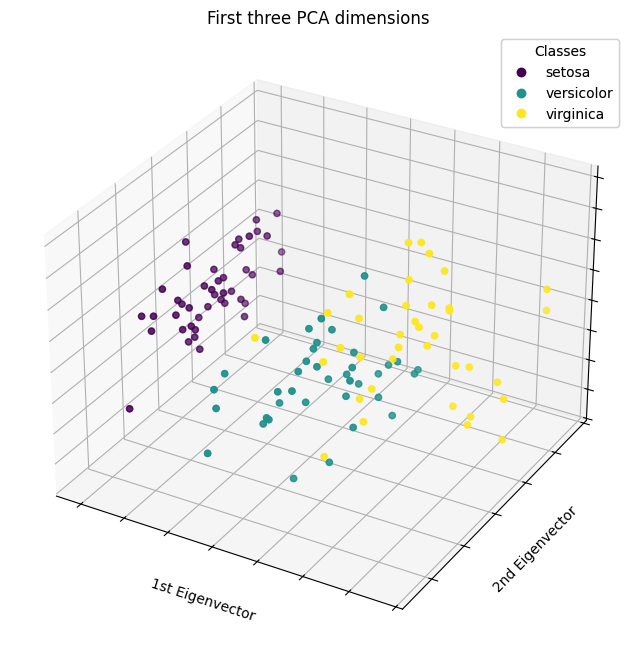

In [131]:
fig